In [1]:
from __future__ import division
import os
import glob
from fractions import Fraction
from collections import Counter, OrderedDict

import numpy as np
import joblib

import my_read_abc

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 6)
# mpl.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体, 解决中文显示问题

In [3]:
def compute_statistics(abc_file):
    """

    :param abc_file: str - path to a abc file
    :return:
    """
    try:
        notes = my_read_abc.parse_abc(abc_file)
        name, duration = zip(*notes)
        name = [n.rstrip("*") for n in name]
        return {
            "name": name,
            "duration": duration
        }
    except Exception as e:
        pass

In [71]:
statistics = joblib.Parallel(n_jobs=10, verbose=0)(
    joblib.delayed(compute_statistics)(abc_file)
    for abc_file in glob.glob(
        os.path.join(os.path.expanduser("~"), "Lab", "Data", "ABCs", "101*.abc"))
)

statistics = [s for s in statistics if s is not None]  # eliminate None values

In [72]:
name_counter = Counter()
duration_counter = Counter()

for s in statistics:
    name_counter.update(Counter(s["name"]))
    duration_counter.update(Counter(s["duration"]))

    
name_counter = OrderedDict(sorted(name_counter.items(), key=lambda t: (t[0][-1], t[0][0])))
duration_counter = OrderedDict(sorted(duration_counter.items(), key=lambda t: t[0]))
# name, name_frequencies = np.array(name_counter.keys()), np.array(name_counter.values())
# duration, duration_frequencies = np.array(duration_counter.keys()), np.array(duration_counter.values())

In [73]:
duration_counter

OrderedDict([(0.5714285714285714, 2),
             (0.6666666666666666, 102),
             (0.8, 11),
             (1.3333333333333333, 387),
             (1.6, 284),
             (1.7777777777777777, 28),
             (2.0, 2076),
             (2.6666666666666665, 5350),
             (4.0, 23734),
             (5.333333333333333, 3474),
             (8.0, 101969),
             (12.0, 6978),
             (16.0, 15805),
             (24.0, 648)])

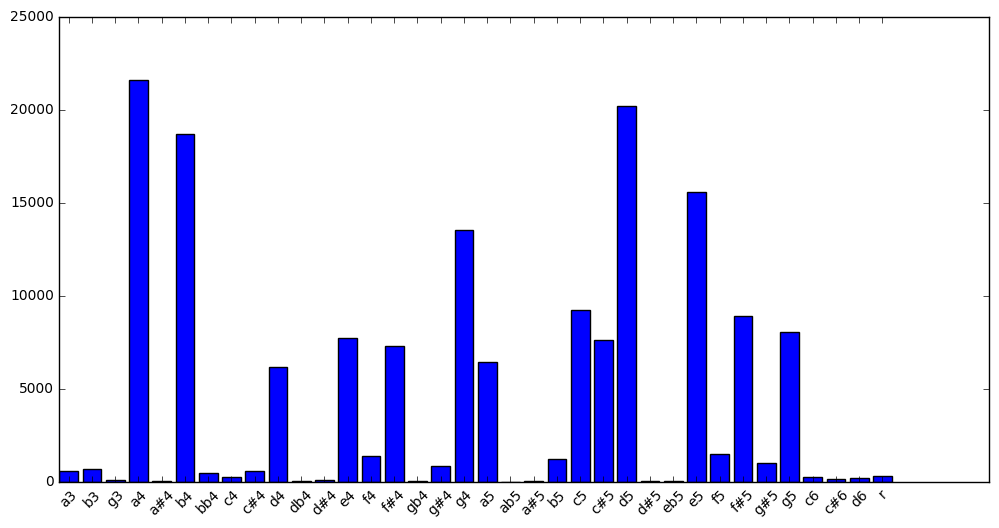

In [74]:
plt.bar(np.arange(len(name_counter)), name_counter.values(), width=0.8)
plt.xticks(np.arange(len(name_counter)) + 0.4, name_counter.keys(), rotation=45)
plt.show()

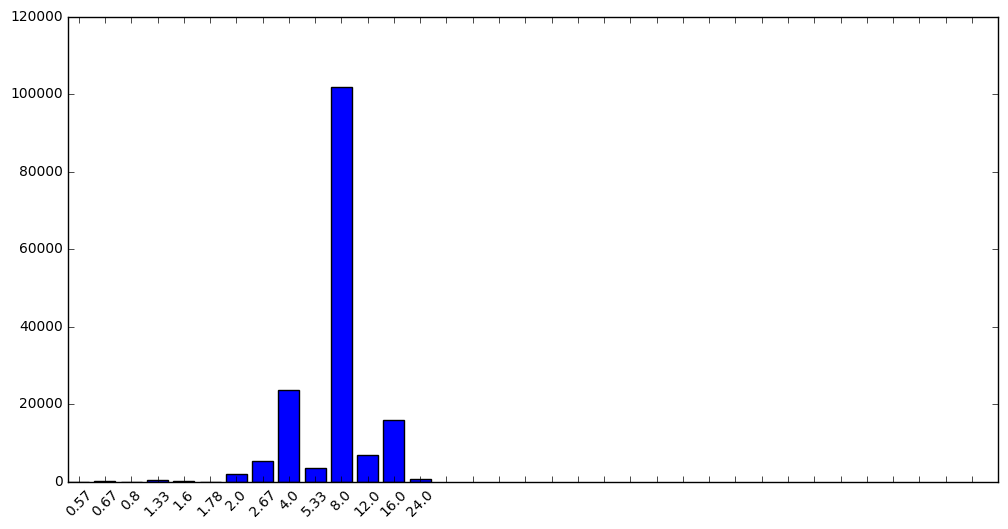

In [75]:
plt.bar(np.arange(len(duration_counter)), duration_counter.values())
plt.xticks(np.arange(len(name_counter)) + 0.4, np.round(duration_counter.keys(), 2), rotation=45)
plt.show()

In [76]:
whole_duration = dict(duration for duration in duration_counter.iteritems() if duration[0].is_integer() and duration[0] != 24.0 and duration[0] != 12.0)
total_usage = sum(whole_duration.values())
whole_duration = {int(k): v/total_usage for k, v in whole_duration.iteritems()}

In [77]:
whole_duration

{2: 0.014458435480276354,
 4: 0.165296969021618,
 8: 0.7101696567862714,
 16: 0.11007493871183419}